## Text classification using Machine Learning

In this notebook we learn how to classify texts using machine learning.

### Table of Contents

* Classification using few ML techniques
    * Logistic Regression
    * Naive Bayes
    * Random Forest
* Cross Validation, Model evaluation
* Model interpretation using ELI5
* Hyperparameter tuning
* Ensemble

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = -1

In [2]:
df = pd.read_csv('clinical_notes_cleaned_pos.csv')

In [3]:
df.head(5)

text  \
0  \n \n \n \n \n <B>CC:</B> Difficulty with word finding.\n \n <B>HX: </B>This 27y/o RHF experienced sudden onset word finding difficulty and slurred speech on the evening of 2/19/96. She denied any associated dysphagia, diplopia, numbness or weakness of her extremities. She went to sleep with her symptoms on 2/19/96, and awoke with them on 2/20/96. She also awoke with a headache (HA) and mild neck stiffness. She took a shower and her HA and neck stiffness resolved. Throughout the day she continued to have difficulty with word finding and had worsening of her slurred speech. That evening, she began to experience numbness and weakness in the lower right face. She felt like there was a &quot;rubber-band&quot; wrapped around her tongue.\n \n For 3 weeks prior to presentation, she experienced transient episodes of a &quot;boomerang&quot; shaped field cut in the left eye. The episodes were not associated with any other symptoms. One week prior to presentation, she went to a local ER for menorrhagia. She had just resumed taking oral birth control pills one week prior to the ER visit after having stopped their use for several months. Local evaluation included an unremarkable carotid duplex scan. However, a HCT with and without contrast reportedly revealed a left frontal gyriform enhancing lesion. An MRI brain scan on 2/20/96 revealed nonspecific white matter changes in the right periventricular region. EEG reportedly showed diffuse slowing. CRP was reportedly &quot;too high&quot; to calibrate.\n \n <B>MEDS:</B> Ortho-Novum 7-7-7 (started 2/3/96), and ASA (started 2/20/96).\n \n <B>PMH:</B> 1)ventral hernia repair 10 years ago, 2)mild &quot;concussion&quot; suffered during a MVA; without loss of consciousness, 5/93, 3) Anxiety disorder, 4) One childbirth.\n \n <B>FHX: </B>She did not know her father and was not in contact with her mother.\n \n <B>SHX:</B> Lives with boyfriend. Smokes one pack of cigarettes every three days and has done so for 10 years. Consumes 6 bottles of beers, one day a week. Unemployed and formerly worked at an herbicide plant.\n \n <B>EXAM: </B>BP150/79, HR77, RR22, 37.4C.\n \n MS: A&O to person, place and time. Speech was dysarthric with mild decreased fluency marked by occasional phonemic paraphasic errors. Comprehension, naming and reading were intact. She was able to repeat, though her repetition was occasionally marked by phonemic paraphasic errors. She had no difficulty with calculation.\n \n CN: VFFTC, Pupils 5/5 decreasing to 3/3. EOM intact. No papilledema or hemorrhages seen on fundoscopy. No RAPD or INO. There was right lower facial weakness. Facial sensation was intact, bilaterally. The rest of the CN exam was unremarkable.\n \n MOTOR: 5/5 strength throughout with normal muscle bulk and tone.\n \n Sensory: No deficits.\n \n Coord/Station/Gait: unremarkable.\n \n Reflexes 2/2 throughout. Plantar responses were flexor, bilaterally.\n \n Gen Exam: unremarkable.\n \n <B>COURSE:</B> CRP 1.2 (elevated), ESR 10, RF 20, ANA 1:40, ANCA &lt;1:40, TSH 2.0, FT4 1.73, Anticardiolipin antibody IgM 10.8GPL units (normal &lt;10.9), Anticardiolipin antibody IgG 14.8GPL (normal&lt;22.9), SSA and SSB were normal. Urine beta-hCG pregnancy and drug screen were negative. EKG, CXR and UA were negative.\n \n MRI brain, 2/21/96 revealed increased signal on T2 imaging in the periventricular white matter region of the right hemisphere. In addition, there were subtle T2 signal changes in the right frontal, right parietal, and left parietal regions as seen previously on her local MRI can. In addition, special FLAIR imaging showed increased signal in the right frontal region consistent with ischemia.\n \n She underwent Cerebral Angiography on 2/22/96. This revealed decreased flow and vessel narrowing the candelabra branches of the RMCA supplying the right frontal lobe. These changes corresponded to the areas of ischemic changes seen on MRI. There was also segmental narrowing of the caliber of the vessels in the circle of

Let us first check the distribution of the outputs.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df['label'].value_counts(normalize=True)

Orthopedic          0.271394
Radiology           0.229829
Gastroenterology    0.191932
Neurology           0.172372
Urology             0.134474
Name: label, dtype: float64

As discussed in the previous session, we need numeric values to use in the models. We use Tfidf representation of texts.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000, #maximum vocabulary size to restrict too many features
                         min_df = 5,
                         max_df = .6
                        )

tfidf_vectorized_corpus = tfidf_vector.fit_transform(df.clean_text)

In [7]:
print (tfidf_vectorized_corpus.shape)

(818, 3842)


We have total 818 texts (data points) and 3842 features (words) for the model. We will use Simple Logistic Regression, Naive Bayes and random forest classifier for our modelling. 

#### Logistic Regression

Logistic regression assumes a linear relationship among the features and predicts log-odd $\log{\frac{p}{(1-p)}}$ of $Y=1$.

#### Naive Bayes

In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features.

<img src=https://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png>

#### Random Forest

Random forests are a collection of simple decision trees. Decision tree is a modelling technique that uses logical cummulation of decision rules to predict target from a set of features.

<img src=https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png>

Random forests are based on ensemble methods, which uses averaging of multiple such decision trees. Each decision tree learns different types of decision rules. Individual decision trees are prone to overfitting. To reduce the variance, we use averaging of decision trees which lead to more robust model.

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

For evaluation, we use cross validation. i.e. train on a part of data and testing on the remaining. We will use 5-fold cross validation. 

<img src=https://miro.medium.com/max/1710/1*rgba1BIOUys7wQcXcL4U5A.png width="500">

In [9]:
lg = LogisticRegression(multi_class='auto',solver='lbfgs')
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=5,estimator=lg)
print (cv_scores, np.mean(cv_scores))

[0.74096386 0.79393939 0.76687117 0.68518519 0.74691358] 0.7467746360874703


In [10]:
nb = MultinomialNB()
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=5,estimator=nb)
print (cv_scores, np.mean(cv_scores))

[0.77108434 0.77575758 0.77300613 0.69135802 0.74691358] 0.751623930602914


NB and Logistic regression both achieve ~75% accuracy on cross validation dataset. As our dataset is not balanced, stratified sampling is better than random kfold. Similarly, f1 metric is better evaluation metric.

In [11]:
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42),estimator=nb,error_score='f1_macro')
print (cv_scores, np.mean(cv_scores))

[0.77108434 0.77575758 0.77300613 0.69135802 0.74691358] 0.751623930602914


In [12]:
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42),estimator=lg,error_score='f1_macro')
print (cv_scores, np.mean(cv_scores))

[0.74096386 0.79393939 0.76687117 0.68518519 0.74691358] 0.7467746360874703


Naive Bayes performs same on stratified KFold, which shows the robustness of the model. Logistic regression performs pretty much similar to Naive Bayes.

Now let us use a simple RF classifier and see how does it perform on 5 fold cross validation.

In [13]:
model = RandomForestClassifier(n_estimators=500, random_state=42) #n_estimator is the parameter to control number of decision tress
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=5,estimator=model)
print (cv_scores, np.mean(cv_scores))

[0.69277108 0.76363636 0.70552147 0.64197531 0.69135802] 0.6990524507399368


In [14]:
cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42),estimator=model,error_score='f1_macro')
print (cv_scores, np.mean(cv_scores))

[0.69277108 0.76363636 0.70552147 0.64197531 0.69135802] 0.6990524507399368


RF achieves 69% macro F1 score on cross validation, much worse than Naive Bayes and Logistic Regression. Now let us use Logistic regrssion on a particular fold and interpret the results.

In [15]:
for train_idx, val_idx in StratifiedKFold(n_splits=5,random_state=42).split(tfidf_vectorized_corpus,df.label.values):
    break

In [16]:
trainX = tfidf_vectorized_corpus[train_idx]
valX = tfidf_vectorized_corpus[val_idx]
trainy = df.label.values[train_idx]
valy = df.label.values[val_idx]

print (trainX.shape, valX.shape)

(652, 3842) (166, 3842)


In [17]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [18]:
lg = LogisticRegression(multi_class='auto',solver='lbfgs')
lg.fit(trainX,trainy)

val_pred = lg.predict(valX)

print ("Accuracy score: {}".format(accuracy_score(valy,val_pred)))
print ("F1 score: {}".format(f1_score(valy,val_pred,average='macro')))

Accuracy score: 0.7409638554216867
F1 score: 0.7404504288438917


In [19]:
def plot_cm(y_true, y_pred, labels, title):
    figsize=(14,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(labels))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap='viridis', annot=annot, fmt='', ax=ax)

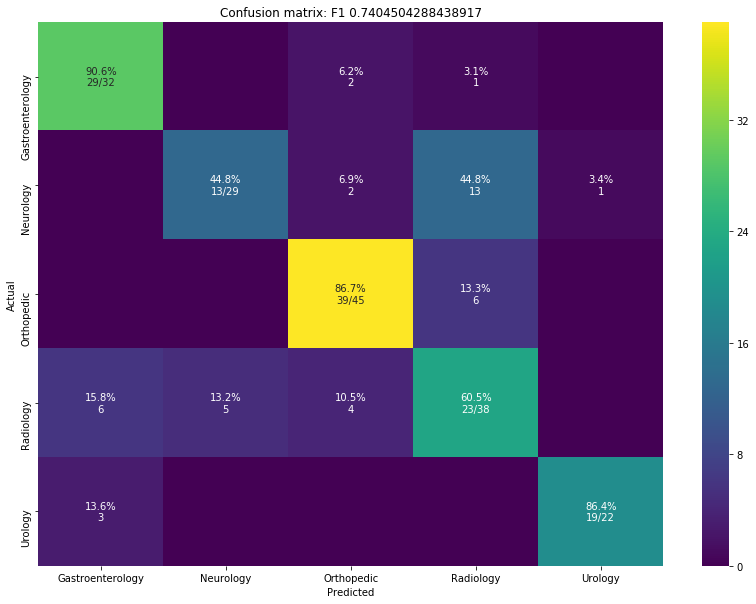

In [20]:
#print (confusion_matrix(valy, val_pred,labels=model.classes_))
labels = lg.classes_
plot_cm(valy,val_pred,labels,'Confusion matrix: F1 {}'.format(f1_score(valy,val_pred,average='macro')))

From the above confusion matrix we can clearly see where our model performed good and where it requires improvment.

### Model interpretation

For interpretability, we must need to understand how our model has learned the task. We will use Eli5. It uses LIME (Local Interpretable Model-agnostic Explanation) technique. Similarly, another popular technique to explain ML models is SHAP (Shapley Additive Explanations).

<img src=eli5.png>

In [21]:
import eli5

First let us see the top words corresponding to each speciality and whether they make any sense

In [22]:
eli5.show_weights(lg, vec=tfidf_vector, top=25)

In the above visualization we see that different words have different importance for different specialities. Now let us explain few test predictions. Eli5 highlights top positive words in yellow and top negative words in red.

In [24]:
df.iloc[val_idx[:3]]['label']

0    Neurology 
1    Orthopedic
2    Orthopedic
Name: label, dtype: object

In [25]:
eli5.show_prediction(lg, doc=df.clean_text.values[val_idx[0]], vec=tfidf_vector, top=10)

In [26]:
eli5.show_prediction(lg, doc=df.clean_text.values[val_idx[1]], vec=tfidf_vector, top=10)

In [27]:
eli5.show_prediction(lg, doc=df.clean_text.values[val_idx[2]], vec=tfidf_vector, top=10)

This clearly shows the inside of our model. As we observed that our model performed poorly particularly for "neurology" and "radiology", we need to make our model robust on those classes. There are lots of different ways to increase model's performance. Here we discuss briefly about hyperparameter tuning and ensemble methods and how they can lead to better result.

### Hyperparameter tuning

Every model has a set of hyper parameters. By tuning different hyperparameters, we can increase model's performance. In this notebook, we tune different hyper parameters of random forest classifier.

* max_depth - maximum depth of each tree
* n_estimators - number of trees

Gridsearch or, randomsearch are used to tune hyperparameters and check oof (out of fold) score. In this notebook, we use hyperopt, a technique that use Bayesian Optimization to search for better hyperparameter.

In [28]:
from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials

In [29]:
def rf_cv(params, random_state=42, cv=5, X=tfidf_vectorized_corpus, y=df.label.values):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth'])}
    
    # we use this params to create a new LGBM Regressor
    model = RandomForestClassifier(random_state=random_state, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

    return score


space = {'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1)
      }

# trials will contain logging information
trials = Trials()

best = fmin(fn=rf_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=10, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(42) # fixing random state for the reproducibility
         )

In [30]:
print("Best F1 {:.3f} params {}".format(-rf_cv(best), best))

Best F1 0.701 params {'max_depth': 19.0, 'n_estimators': 500.0}


### Ensemble

Ensemble is very useful technique to increase model's performance and reduce overfitting. By combining multiple models, we can make our prediction more robust, reduce overfitting and increase overall performance. We use max voting of multiple classifiers.

In [31]:
from sklearn.ensemble import VotingClassifier

In [37]:
voting_classifier = VotingClassifier(estimators=[('rf',RandomForestClassifier(n_estimators=500,max_depth=19,random_state=42)),
                                     ('nb', MultinomialNB()),
                                     ('lg', LogisticRegression(multi_class='auto',solver='lbfgs'))], voting='hard')

cv_scores = cross_val_score(X=tfidf_vectorized_corpus,y=df.label,cv=StratifiedKFold(5,random_state=42),estimator=voting_classifier,scoring='f1_macro')
print (cv_scores, np.mean(cv_scores))

[0.70882448 0.78275961 0.76362667 0.66788049 0.74150141] 0.7329185323711882


### Practical Tips

* Always use cross validation to check model performance. Understand the data to use - KFold or, StratifiedKFold, GroupKFold
* Start with simple model and gradually use more complex model
* For production, use scikit-learn's pipeline for E2E feature learning and modelling.
* Use joblib to persist model after training so that it can be called directly during inference
* Fix random seeds to avoid any randomization

### References

1. https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893

2. https://towardsdatascience.com/understanding-model-predictions-with-lime-a582fdff3a3b

3. https://github.com/marcotcr/lime